In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [8]:
train =pd.read_csv(r"C:\Users\Rahi\Downloads\train.csv")
test =pd.read_csv(r"C:\Users\Rahi\Downloads\test.csv")

In [4]:
train.shape

(800, 22)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
train.isnull().sum()

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [7]:
train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [9]:
#age_desc has the same value everywhere so we remove the variable
train.drop('age_desc', axis=1, inplace=True)
test.drop('age_desc', axis=1, inplace=True)

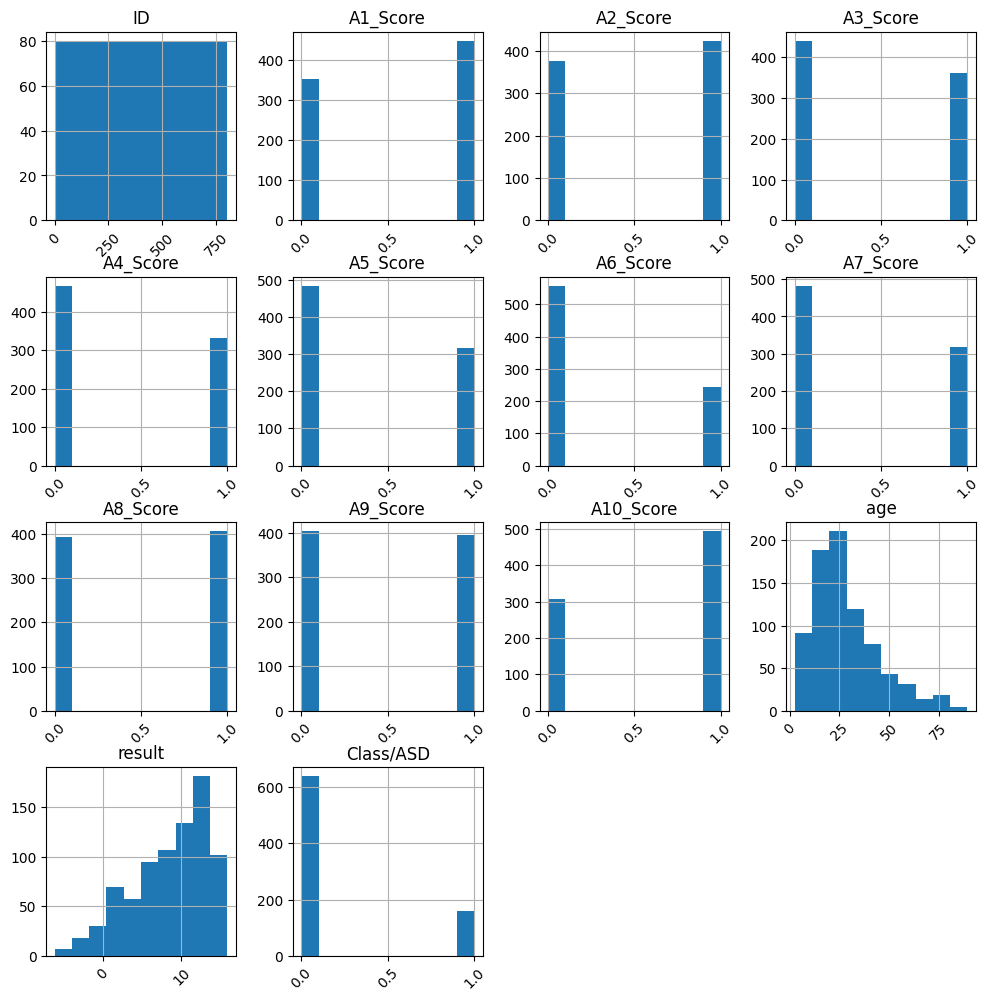

In [11]:
train.hist(figsize=(12,12), xrot=45)
plt.show()

In [13]:
cat_cols = train.select_dtypes(include=['object']).columns
cat_cols = cat_cols.append(train.filter(like='Score').columns)
cat_cols

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation', 'A1_Score', 'A2_Score', 'A3_Score',
       'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score',
       'A10_Score'],
      dtype='object')

In [14]:
for col in cat_cols:
    display(pd.crosstab(train['Class/ASD'], train[col], normalize='index'))

gender,f,m
Class/ASD,,
0,0.336463,0.663537
1,0.341615,0.658385


ethnicity,?,Asian,Black,Hispanic,Latino,Middle Eastern,Others,Pasifika,South Asian,Turkish,White-European,others
Class/ASD,,,,,,,,,,,,
0,0.306729,0.098592,0.064163,0.010955,0.020344,0.142410,0.042254,0.040689,0.048513,0.007825,0.212833,0.004695
1,0.043478,0.024845,0.037267,0.012422,0.024845,0.037267,0.012422,0.037267,0.018634,0.000000,0.751553,0.000000


jaundice,no,yes
Class/ASD,,
0,0.798122,0.201878
1,0.652174,0.347826


austim,no,yes
Class/ASD,,
0,0.902973,0.097027
1,0.571429,0.428571


contry_of_res,Afghanistan,AmericanSamoa,Angola,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,...,South Africa,Spain,Sri Lanka,Sweden,Tonga,Ukraine,United Arab Emirates,United Kingdom,United States,Viet Nam
Class/ASD,,,,,,,,,,,,,,,,,,,,,
0,0.029734,0.00626,0.001565,0.001565,0.003130,0.003130,0.046948,0.026604,0.003130,0.007825,...,0.00939,0.012520,0.025039,0.00313,0.001565,0.003130,0.062598,0.061033,0.101721,0.004695
1,0.018634,0.00000,0.000000,0.000000,0.012422,0.012422,0.043478,0.006211,0.012422,0.006211,...,0.00000,0.012422,0.006211,0.00000,0.000000,0.006211,0.000000,0.173913,0.428571,0.012422


used_app_before,no,yes
Class/ASD,,
0,0.942097,0.057903
1,0.919255,0.080745


relation,?,Health care professional,Others,Parent,Relative,Self
Class/ASD,,,,,,
0,0.061033,0.001565,0.00313,0.032864,0.021909,0.879499
1,0.006211,0.006211,0.00000,0.049689,0.024845,0.913043


A1_Score,0,1
Class/ASD,,
0,0.514867,0.485133
1,0.142857,0.857143


A2_Score,0,1
Class/ASD,,
0,0.563380,0.436620
1,0.099379,0.900621


A3_Score,0,1
Class/ASD,,
0,0.665102,0.334898
1,0.093168,0.906832


A4_Score,0,1
Class/ASD,,
0,0.708920,0.291080
1,0.093168,0.906832


A5_Score,0,1
Class/ASD,,
0,0.71831,0.28169
1,0.15528,0.84472


A6_Score,0,1
Class/ASD,,
0,0.821596,0.178404
1,0.198758,0.801242


A7_Score,0,1
Class/ASD,,
0,0.713615,0.286385
1,0.161491,0.838509


A8_Score,0,1
Class/ASD,,
0,0.569640,0.430360
1,0.180124,0.819876


A9_Score,0,1
Class/ASD,,
0,0.621283,0.378717
1,0.043478,0.956522


A10_Score,0,1
Class/ASD,,
0,0.466354,0.533646
1,0.049689,0.950311


In [15]:
#Remove factors that doesn't have impact on target
train.drop(['gender','used_app_before','age'],axis=1,inplace=True)
test.drop(['gender','used_app_before','age'],axis=1,inplace=True)

In [17]:
cat_cols= cat_cols.to_list()
cat_cols

['gender',
 'ethnicity',
 'jaundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'relation',
 'A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score']

In [22]:
cat_cols.remove('used_app_before')
cat_cols.remove('gender')

In [23]:
train.sample(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,ethnicity,jaundice,austim,contry_of_res,result,relation,Class/ASD
443,444,0,0,0,0,0,0,1,0,0,0,Asian,no,no,India,1.182437,Self,0
0,1,1,0,1,0,1,0,1,0,1,1,?,no,no,Austria,6.351166,Self,0
438,439,1,1,1,1,1,0,0,0,1,1,White-European,no,no,AmericanSamoa,9.071151,Self,0
48,49,1,1,1,1,0,0,1,1,1,1,White-European,no,no,United States,12.512264,Parent,0
674,675,1,1,1,1,0,1,1,1,1,1,White-European,no,yes,Ukraine,8.913192,Self,1


In [24]:
var_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
var_enc.fit(train[cat_cols])
train[cat_cols] = var_enc.transform(train[cat_cols])

In [25]:
train.sample(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,ethnicity,jaundice,austim,contry_of_res,result,relation,Class/ASD
510,511,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,6.0,1.0,0.0,35.0,-1.036113,5.0,0
515,516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,15.0,-0.568835,5.0,0
229,230,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,25.0,15.815370,5.0,0
322,323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,52.0,1.776522,5.0,0
163,164,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,25.0,5.593677,5.0,0


In [26]:
X = train.drop(['ID','Class/ASD'],axis=1)
y = train['Class/ASD']

In [27]:
X_test = test.drop(['ID'],axis=1)

In [28]:
train['Class/ASD'].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

seed = 1234
model = LogisticRegression(random_state = seed,class_weight="balanced")
scores = cross_val_score(model, X, y, scoring = 'roc_auc', cv = 5)
print(scores)
print(np.mean(scores))

C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[0.88769531 0.88720703 0.92382812 0.92626953 0.94201861]
0.9134037222619901


C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab